# Using Pycaret library Tabular Playground Competition! #

In [1]:
import pandas as pd
from pathlib import Path

data_dir = Path('../input/tabular-playground-series-sep-2021/')

df_train = pd.read_csv(
    data_dir / "train.csv",
    index_col='id',
    nrows=25000,  # comment this row to use the full dataset
)

FEATURES = df_train.columns[:-1]
TARGET = df_train.columns[-1]

df_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
id,,,,,,,,,,,,,,,,,,,,,
0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,144.120,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [2]:
!pip install pycaret[full]

     |████████████████████████████████| 266 kB 605 kB/s 
     |████████████████████████████████| 25.9 MB 6.1 kB/s 
     |████████████████████████████████| 167 kB 57.1 MB/s 
     |████████████████████████████████| 24.2 MB 54.1 MB/s 
     |████████████████████████████████| 14.6 MB 45.0 MB/s 
     |████████████████████████████████| 111 kB 57.2 MB/s 
     |████████████████████████████████| 356 kB 57.1 MB/s 
     |████████████████████████████████| 40 kB 6.0 MB/s 
     |████████████████████████████████| 6.6 MB 24.5 MB/s 
     |████████████████████████████████| 3.6 MB 60.2 MB/s 
     |████████████████████████████████| 7.3 MB 49.7 MB/s 
     |████████████████████████████████| 5.8 MB 49.4 MB/s 
     |████████████████████████████████| 756 kB 65.1 MB/s 
     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 166 kB 63.2 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
     |████████████████████████████████| 357 kB 58.9 MB/s 
     |█████████████

Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

In [4]:
train = pd.read_csv('../input/tabular-playground-series-sep-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-sep-2021/test.csv')

data = pd.concat([train, test])

In [5]:
df_data = data.drop(columns = 'id')

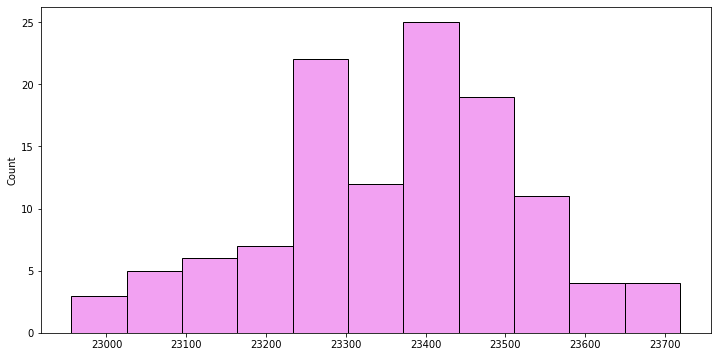

In [6]:
plt.figure(figsize = (12, 6))
missing_values = df_data.isnull().sum()[:-1]
sns.histplot(missing_values, color='violet');
plt.show()

In [7]:
print('\n')
print('-------- Distribution of Missing values --------')
print('Min:', missing_values.min())
print('Max:', missing_values.max())
print('Mean:', missing_values.mean())
print('------------------------------------------------')



-------- Distribution of Missing values --------
Min: 22956
Max: 23719
Mean: 23364.406779661018
------------------------------------------------


In [8]:
df_data.describe

<bound method NDFrame.describe of               f1        f2         f3        f4       f5         f6       f7  \
0       0.108590  0.004314    -37.566  0.017364  0.28915 -10.251000   135.12   
1       0.100900  0.299610  11822.000  0.276500  0.45970  -0.837330  1721.90   
2       0.178030 -0.006980    907.270  0.272140  0.45948   0.173270  2298.00   
3       0.152360  0.007259    780.100  0.025179  0.51947   7.491400   112.51   
4       0.116230  0.502900   -109.150  0.297910  0.34490  -0.409320  2538.90   
...          ...       ...        ...       ...      ...        ...      ...   
493469 -0.009112  0.308190    637.640  0.778200  0.41415  -1.068500   651.22   
493470  0.088922  0.482650   6924.100  0.025963  0.35540  -0.870200  2514.20   
493471  0.140620  0.484750   1797.100  0.147020  0.28803  -1.407100   434.03   
493472  0.168000  0.351760    454.790  0.164580  0.16983   0.323850  2331.20   
493473  0.093079  0.501860   3322.400       NaN  0.33269   0.056827  2568.70   

     

In [9]:
train2 = df_data[:len(train)]
test2 = df_data[len(train):]
test2.drop(columns = 'claim', inplace = True)

In [10]:
from pycaret.classification import *
clf = setup(data=train2, target = 'claim', session_id=42, log_experiment=True,numeric_imputation = 'mean',normalize = True,
        normalize_method = 'robust',fold = 3,
        silent= True,
        use_gpu=True,)

,Description,Value
0,session_id,42
1,Target,claim
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(957919, 119)"
5,Missing Values,True
6,Numeric Features,118
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
cat = create_model(estimator = 'catboost', fold = 5)
    

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6839,0.7412,0.6257,0.7071,0.6639,0.3677,0.3702
1,0.6881,0.7468,0.6251,0.7142,0.6667,0.3761,0.3791
2,0.6865,0.7451,0.6233,0.7125,0.6649,0.3729,0.3759
3,0.6867,0.7451,0.6260,0.7115,0.6660,0.3733,0.3760
4,0.6850,0.7429,0.6239,0.7097,0.6640,0.3698,0.3726
Mean,0.6861,0.7442,0.6248,0.7110,0.6651,0.3720,0.3747
SD,0.0015,0.0020,0.0010,0.0024,0.0011,0.0029,0.0031


In [12]:
lgbm = create_model(estimator = 'lightgbm', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7010,0.7612,0.6122,0.7433,0.6714,0.4019,0.4082
1,0.7016,0.7638,0.6142,0.7432,0.6726,0.4030,0.4092
2,0.7027,0.7642,0.6163,0.7440,0.6741,0.4053,0.4113
3,0.7029,0.7639,0.6152,0.7448,0.6738,0.4055,0.4117
4,0.7013,0.7608,0.6141,0.7426,0.6723,0.4023,0.4085
Mean,0.7019,0.7628,0.6144,0.7436,0.6728,0.4036,0.4098
SD,0.0008,0.0015,0.0014,0.0007,0.0010,0.0015,0.0015


In [13]:
xgb = create_model(estimator = 'xgboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7170,0.7733,0.6541,0.7472,0.6976,0.4339,0.4373
1,0.7169,0.7748,0.6523,0.7481,0.6969,0.4337,0.4373
2,0.7165,0.7744,0.6519,0.7476,0.6965,0.4329,0.4365
3,0.7163,0.7764,0.6522,0.7471,0.6964,0.4325,0.4360
4,0.7171,0.7745,0.6533,0.7479,0.6974,0.4341,0.4376
Mean,0.7168,0.7747,0.6528,0.7476,0.6970,0.4334,0.4369
SD,0.0003,0.0010,0.0008,0.0004,0.0005,0.0006,0.0006


In [14]:
boosted_lgbm = ensemble_model(lgbm, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7093,0.7698,0.6330,0.7459,0.6849,0.4184,0.4233
1,0.7113,0.7727,0.6366,0.7473,0.6875,0.4224,0.4271
2,0.7123,0.7717,0.6385,0.7479,0.6889,0.4244,0.4290
Mean,0.7110,0.7714,0.6361,0.7470,0.6871,0.4217,0.4265
SD,0.0012,0.0012,0.0023,0.0008,0.0017,0.0025,0.0024


In [15]:
blender = blend_models(estimator_list = [cat,boosted_lgbm,xgb], fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7189,0.7782,0.6554,0.7497,0.6994,0.4376,0.4411
1,0.7196,0.7810,0.6546,0.7514,0.6997,0.4391,0.4428
2,0.7194,0.7803,0.6550,0.7508,0.6997,0.4387,0.4423
3,0.7198,0.7816,0.6548,0.7516,0.6999,0.4394,0.4431
4,0.7199,0.7796,0.6560,0.7511,0.7003,0.4397,0.4432
Mean,0.7195,0.7801,0.6552,0.7509,0.6998,0.4389,0.4425
SD,0.0004,0.0012,0.0005,0.0007,0.0003,0.0007,0.0008


In [16]:
pred_holdout = predict_model(blender)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7210,0.7822,0.6576,0.7506,0.7010,0.4416,0.4450


In [17]:
final_model = finalize_model(blender)

In [18]:
prep_pipe = get_config('prep_pipe')
prep_pipe.steps.append(['trained_model', final_model])
pred = prep_pipe.predict_proba(test2)

In [19]:
sub = pd.read_csv('../input/tabular-playground-series-sep-2021/sample_solution.csv')
sub

,id,claim
0,957919,0.5
1,957920,0.5
2,957921,0.5
3,957922,0.5
4,957923,0.5
...,...,...
493469,1451388,0.5
493470,1451389,0.5
493471,1451390,0.5
493472,1451391,0.5


In [20]:
result=pred

In [21]:
sub['claim'] = result[:, 1]
sub.to_csv('sub.csv', index = 0)